In [43]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Importing relevant libraries

In [69]:
from PIL import Image
import zipfile
import shutil
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. Organizing directory

In [73]:
with zipfile.ZipFile("./Spill_Data.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

In [45]:
train_nospill_img_list = glob.glob("Spill_Data/Train/NoSpill*.jpg")
train_spill_img_list = glob.glob("Spill_Data/Train/Oilspill*.jpg")
test_nospill_img_list = glob.glob("Spill_Data/Test/NoSpill*.jpg")
test_spill_img_list = glob.glob("Spill_Data/Test/Oilspill*.jpg")
print(f"Total number of train images: {len(train_nospill_img_list) + len(train_spill_img_list)}")
print(f"Number of No Spill images in train dataset: {len(train_nospill_img_list)}")
print(f"Number of Spill images in train dataset: {len(train_spill_img_list)}")
print("\n")
print(f"Total number of test images: {len(test_nospill_img_list) + len(test_spill_img_list)}")
print(f"Number of No Spill images in test dataset: {len(test_nospill_img_list)}")
print(f"Number of Spill images in test dataset: {len(test_spill_img_list)}")

Total number of train images: 300
Number of No Spill images in train dataset: 132
Number of Spill images in train dataset: 168


Total number of test images: 112
Number of No Spill images in test dataset: 42
Number of Spill images in test dataset: 70


In [46]:
# !mkdir /kaggle/working/train

In [47]:
# !mkdir /kaggle/working/train/spill
!mkdir "./Spill_Data/Train/spill"

In [48]:
# !mkdir /kaggle/working/train/nospill
!mkdir "./Spill_Data/Train/nospill"

In [49]:
# !mkdir /kaggle/working/test

In [50]:
# !mkdir /kaggle/working/test/spill
!mkdir "./Spill_Data/Test/spill"

In [51]:
# !mkdir /kaggle/working/test/nospill
!mkdir "./Spill_Data/Test/nospill"

In [52]:
print(train_nospill_img_list[:5])

['Spill_Data/Train\\NoSpill_007.jpg', 'Spill_Data/Train\\NoSpill_008.jpg', 'Spill_Data/Train\\NoSpill_009.jpg', 'Spill_Data/Train\\NoSpill_010.jpg', 'Spill_Data/Train\\NoSpill_011.jpg']


In [53]:
for train_file in train_nospill_img_list:
    file_name = train_file.split("\\")[-1]
    new_path = f"./Spill_Data/Train/nospill/{file_name}"
    shutil.move(train_file, new_path)

In [54]:
for train_file in train_spill_img_list:
    file_name = train_file.split("\\")[-1]
    new_path = f"./Spill_Data/Train/spill/{file_name}"
    shutil.move(train_file, new_path)

In [55]:
for test_file in test_nospill_img_list:
    file_name = test_file.split("\\")[-1]
    new_path = f"./Spill_Data/Test/nospill/{file_name}"
    shutil.move(test_file, new_path)

In [56]:
for test_file in test_spill_img_list:
    file_name = test_file.split("\\")[-1]
    new_path = f"./Spill_Data/Test/spill/{file_name}"
    shutil.move(test_file, new_path)

# 3. Visualizing our data

## 3.1 Train images (oil spill)

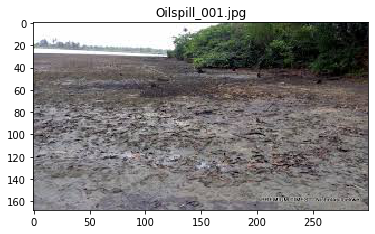

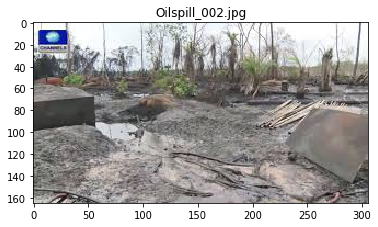

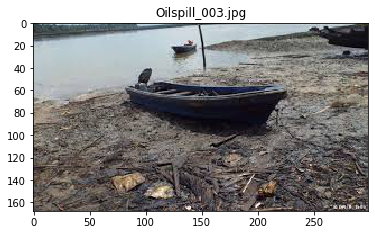

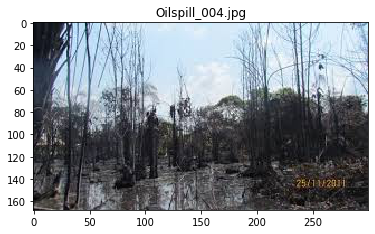

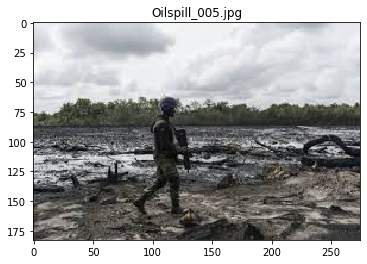

In [57]:
i=0
for oilspill_train_file in os.listdir("./Spill_Data/Train/spill"):
    img = Image.open(f"./Spill_Data/Train/spill/{oilspill_train_file}")
    plt.imshow(img)
    plt.title(oilspill_train_file)
    plt.show()
    i+=1
    if i==5:
        break

## 3.2 Train images (no spill)

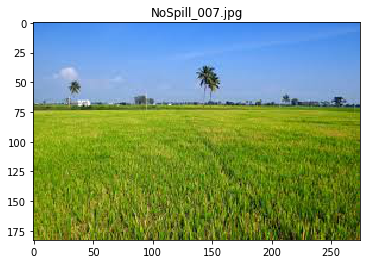

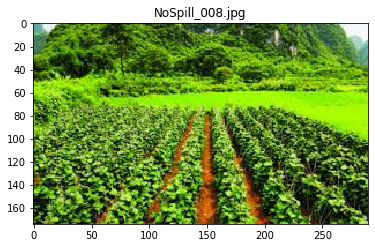

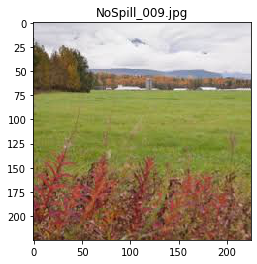

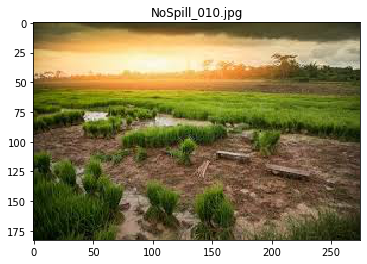

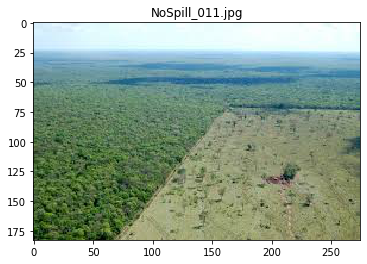

In [58]:
i=0
for nospill_train_file in os.listdir("./Spill_Data/Train/nospill"):
    img = Image.open(f"./Spill_Data/Train/nospill/{nospill_train_file}")
    plt.imshow(img)
    plt.title(nospill_train_file)
    plt.show()
    i+=1
    if i==5:
        break

## 3.3 Test images (oil spill)

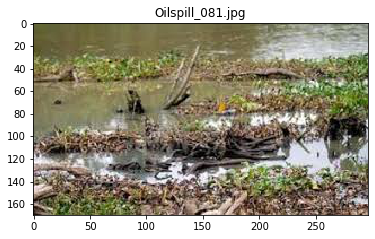

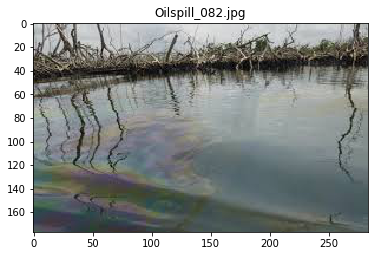

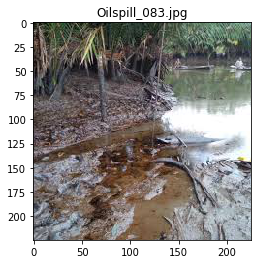

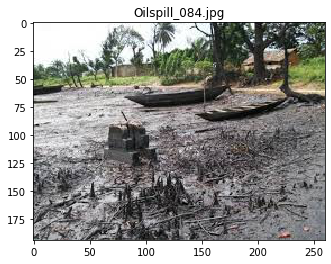

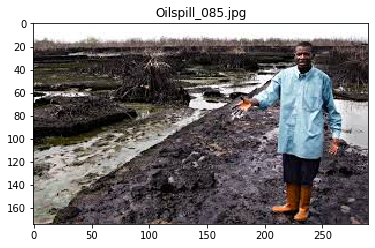

In [59]:
i=0
for spill_test_file in os.listdir("./Spill_Data/Test/spill"):
    img = Image.open(f"./Spill_Data/Test/spill/{spill_test_file}")
    plt.imshow(img)
    plt.title(spill_test_file)
    plt.show()
    i+=1
    if i==5:
        break

## 3.4 Test images (no spill)

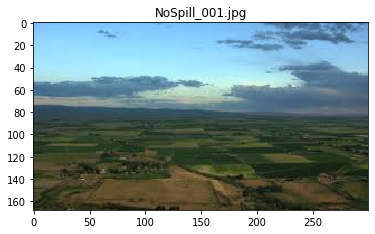

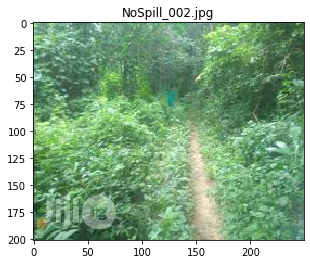

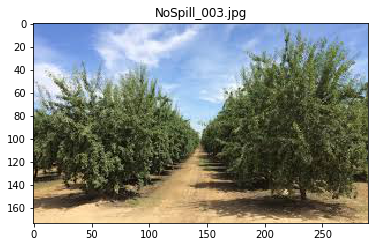

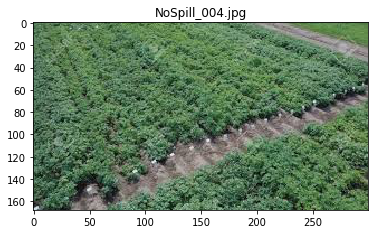

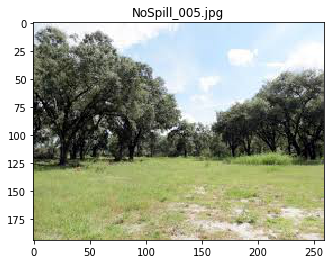

In [60]:
i=0
for nospill_test_file in os.listdir("./Spill_Data/Test/nospill"):
    img = Image.open(f"./Spill_Data/Test/nospill/{nospill_test_file}")
    plt.imshow(img)
    plt.title(nospill_test_file)
    plt.show()
    i+=1
    if i==5:
        break

# 4. Creating train, test and validation sets (ImageDataGenerator)

In [61]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [62]:
train_generator = train_datagen.flow_from_directory(
    "./Spill_Data/Train/",
    target_size=(150,150),
    class_mode="binary"
)

Found 300 images belonging to 2 classes.


In [63]:
validation_generator = validation_datagen.flow_from_directory(
    "./Spill_Data/Test/",
    target_size=(150,150),
    class_mode="binary"
)

Found 112 images belonging to 2 classes.


# 5. Creating Convolutional Neural Network

In [64]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs.get('accuracy')>=0.95):
      print("\nReached 95% accuracy so cancelling training1")
      self.model.stop_training=True
callbacks = myCallback()

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [66]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 1000,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/1000
8/8 [==============================] - 4s 454ms/step - loss: 1.3079 - accuracy: 0.4449 - val_loss: 0.6529 - val_accuracy: 0.6250
Epoch 2/1000
8/8 [==============================] - 3s 350ms/step - loss: 0.6741 - accuracy: 0.5664 - val_loss: 0.6368 - val_accuracy: 0.6696
Epoch 3/1000
8/8 [==============================] - 3s 323ms/step - loss: 0.6105 - accuracy: 0.6695 - val_loss: 0.5753 - val_accuracy: 0.7232
Epoch 4/1000
8/8 [==============================] - 3s 343ms/step - loss: 0.5700 - accuracy: 0.7188 - val_loss: 0.4380 - val_accuracy: 0.7946
Epoch 5/1000
8/8 [==============================] - 3s 341ms/step - loss: 0.4074 - accuracy: 0.8390 - val_loss: 0.3419 - val_accuracy: 0.8571
Epoch 6/1000
8/8 [==============================] - 3s 362ms/step - loss: 0.2842 - accuracy: 0.9110 - val_loss: 0.1917 - val_accuracy: 0.9554
Epoch 7/1000
8/8 [==============================] - 3s 355ms/step - loss: 0.2390 - accuracy: 0.9237 - val_loss: 0.3109 - val_accuracy: 0.8839
Epoch 

# 6. Evaluation

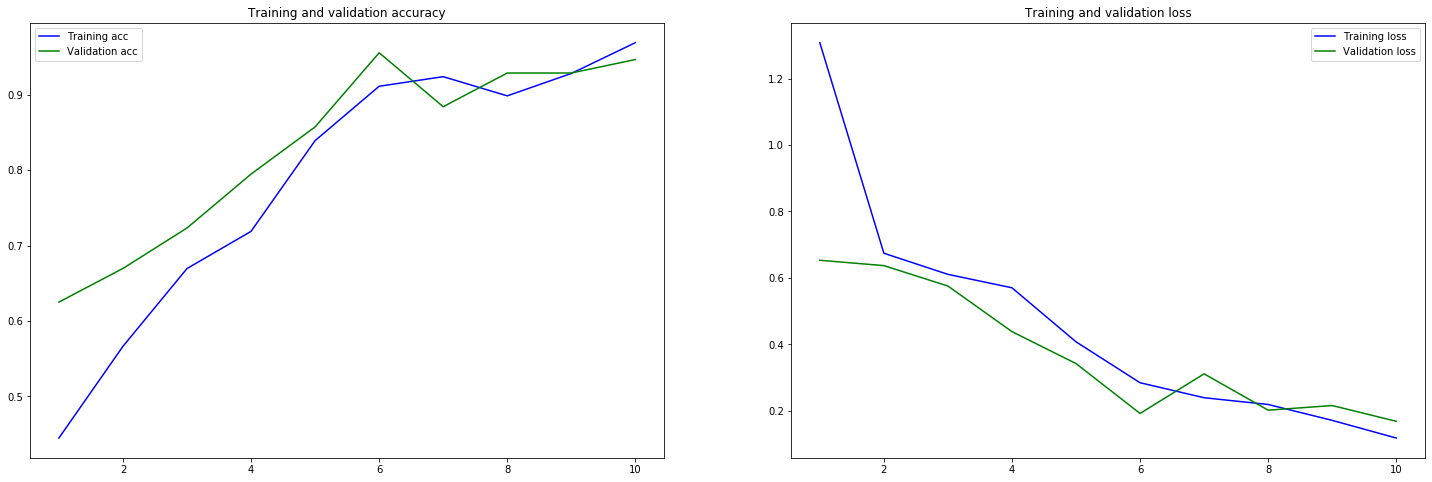

In [68]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# accuracy
fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(121)
ax1.plot(epochs, acc, "b-", label="Training acc")
ax1.plot(epochs, val_acc, "g-", label="Validation acc")
ax1.set_title("Training and validation accuracy")
ax1.legend()

# loss
ax2 = fig.add_subplot(122)
ax2.plot(epochs, loss, "b-", label="Training loss")
ax2.plot(epochs, val_loss, "g-", label="Validation loss")
ax2.set_title("Training and validation loss")
ax2.legend()